# Q-Learning Algorithm

Performance analysis on `FrozenLake-v0` OpenAI Gym Environment.

## Training Process & Evaluation

In [1]:
import gym
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt

from qlearning import QLearning, SARSA

In [2]:
env = gym.make('FrozenLake-v0')  # Also works with `FrozenLake8x8-v0` env.
algo = QLearning(learning_rate=0.1, exploration_rate=1.0, num_episodes=10_000)
q = algo.train(env)

In [3]:
trajectories = [QLearning.episode(q, env) for _ in range(1_000)]
rewards = [trajectory.reward() for trajectory in trajectories]

print(f"Reward: {statistics.mean(rewards):.2f} ± {statistics.stdev(rewards):.2f}")

Reward: 0.75 ± 0.43


## Example Episode

Winter is here. You and your friends were tossing around a frisbee at the park
when you made a wild throw that left the frisbee out in the middle of the lake.
The water is mostly frozen, but there are a few holes where the ice has melted.
If you step into one of those holes, you'll fall into the freezing water.
At this time, there's an international frisbee shortage, so it's absolutely imperative that
you navigate across the lake and retrieve the disc.

However, the ice is slippery, so you won't always move in the direction you intend.
The surface is described using a grid like the following

```
SFFF
FHFH
FFFH
HFFG
```

`S` : Starting point, safe
`F` : Frozen surface, safe
`H` : Hole, fall to your doom
`G` : Goal, where the frisbee is located

The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise.

In [4]:
QLearning.episode(q, env, render=True)

  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


## State to Row and Column Map

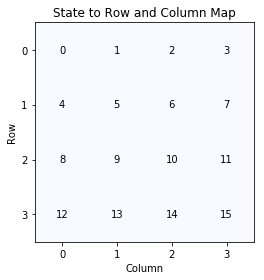

In [5]:
size = round(math.sqrt(env.observation_space.n))
action_map = ['←', '↓', '→', '↑']
state_map = [(state % size, state // size) for state in range(env.observation_space.n)]

fig = plt.imshow(np.zeros([size, size]), cmap="Blues")
ax = plt.gca()

for state in range(env.observation_space.n):
    row, col = state_map[state]
    ax.text(row, col, f"{state}", ha="center", va="center")

ax.set_xticks(range(size))
ax.set_yticks(range(size))

plt.title('State to Row and Column Map')
plt.xlabel('Column')
plt.ylabel('Row')
plt.tight_layout()

## Visualization of State-Action Value Function

In [6]:
qnp = np.zeros([env.observation_space.n, env.action_space.n])
for state in range(env.observation_space.n):
    for action in range(env.action_space.n):
        qnp[state, action] = q[state, action]

fig = plt.imshow(qnp.T, cmap="Blues")
ax = plt.gca()

for state in range(env.observation_space.n):
    for action in range(env.action_space.n):
        ax.text(state, action, f"{q[state, action]:.1f}", ha="center", va="center")

ax.set_xticks(range(env.observation_space.n))
ax.set_xticklabels(range(env.observation_space.n))
ax.set_yticks(range(env.action_space.n))
ax.set_yticklabels(action_map)

plt.title('State-Action Function Value (Q)')
plt.ylabel('Action')
plt.xlabel('State')
plt.tight_layout()

## Visualization of State Value Function


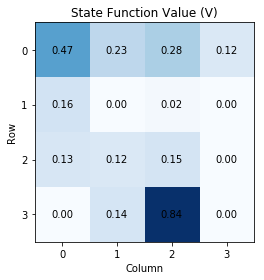

In [7]:
vnp = np.zeros([size, size])
for state in range(env.observation_space.n):
    row, col = state_map[state]
    vnp[row, col] = qnp[state, :].mean()

fig = plt.imshow(vnp.T, cmap="Blues")
ax = plt.gca()

for row in range(size):
    for col in range(size):
        ax.text(row, col, f"{vnp[row, col]:.2f}", ha="center", va="center")

ax.set_xticks(range(size))
ax.set_yticks(range(size))

plt.title('State Function Value (V)')
plt.ylabel('Row')
plt.xlabel('Column')
plt.tight_layout()

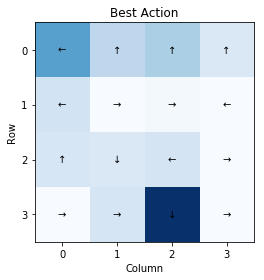

In [8]:
fig = plt.imshow(vnp.T, cmap="Blues")
ax = plt.gca()

for state in range(env.observation_space.n):
    row, col = state_map[state]
    action = q.best_action(state)
    ax.text(row, col, f"{action_map[action]}", ha="center", va="center")

ax.set_xticks(range(size))
ax.set_yticks(range(size))

plt.title('Best Action')
plt.ylabel('Row')
plt.xlabel('Column')
plt.tight_layout()

## Exploration Rate Study

In [9]:
rewards_mean = []
rewards_stdev = []
exploration_rates = np.linspace(0.0, 1.0, num=10)

env = gym.make('FrozenLake-v0')
for exploration_rate in exploration_rates:
    algo = QLearning(learning_rate=0.1, exploration_rate=exploration_rate, num_episodes=10_000)
    q = algo.train(env)

    trajectories = [QLearning.episode(q, env) for _ in range(1_000)]
    rewards = [trajectory.reward() for trajectory in trajectories]
    rewards_mean += [statistics.mean(rewards)]
    rewards_stdev += [statistics.stdev(rewards)]

In [10]:
plt.errorbar(exploration_rates, rewards_mean, yerr=rewards_stdev, fmt='o')

plt.title('Exploration Rate Sensitivity')
plt.ylabel('Mean Score')
plt.xlabel('Exploration Rate')
plt.ylim([0, 1])
plt.tight_layout()